In [4]:
import geopandas as gpd

from shapely.geometry import shape, mapping
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import Point
import mapclassify
import geoplot.crs as gcrs

from tqdm import tqdm
import geoplot
import pycountry
from shapely.geometry import LineString

In [127]:
import pandas as pd

In [92]:
offshore=gpd.read_file('eu_shapes/offshore_shapes.geojson')
offshore['gdp']=10000

In [165]:
onshore=gpd.read_file('eu_shapes/nuts3_shapes.geojson')
country=gpd.read_file('eu_shapes/country_shapes.geojson')
eu=gpd.read_file('eu_shapes/europe_shape.geojson')
eu['gdp']=100000
country['gdp']=10000

In [134]:
density_map=gpd.read_file('result/final.shp')
density_map.geometry=density_map.geometry.buffer(0)

In [145]:
offshore=offshore.to_crs(crs='EPSG:3395')

In [146]:
data=gpd.clip(country,offshore.buffer(50000).to_crs(crs='EPSG:4326'))
data['gdp']=10000
data.geometry=data.geometry.buffer(0)

In [143]:
realoffshore=gpd.overlay(offshore,country2,how='difference')

In [144]:
realoffshore

,name,geometry,gdp
0,BE,"POLYGON ((2.34664 51.35193, 2.23812 51.55777, ...",10000
1,LV,"MULTIPOLYGON (((23.31631 57.59087, 23.40602 57...",10000
2,EE,"MULTIPOLYGON (((25.94929 59.86218, 25.96778 59...",10000
3,BG,"POLYGON ((29.02584 43.69328, 29.13809 43.68008...",10000
4,RO,"POLYGON ((30.12450 45.05953, 30.97703 44.77742...",10000
5,GR,"MULTIPOLYGON (((26.03943 40.39633, 26.04991 40...",10000
6,AL,"MULTIPOLYGON (((19.03320 40.07799, 18.98679 40...",10000
7,FI,"MULTIPOLYGON (((27.47621 60.23551, 27.46389 60...",10000
8,DK,"MULTIPOLYGON (((16.50825 55.35517, 14.63672 54...",10000
9,NL,"POLYGON ((3.01503 51.60234, 3.00022 51.59935, ...",10000


In [167]:
offshore2=offshore.copy()
offshore2=offshore2.to_crs('EPSG:3395')

In [168]:
offshore2.geometry=offshore2.buffer(50000)
offshore2=offshore2.to_crs(crs='EPSG:4326')

In [169]:
data=gpd.overlay(country,offshore2,how='difference')

In [125]:

def geo_concat(list_to_concat):
    return gpd.GeoDataFrame(pd.concat(list_to_concat,ignore_index=True)).set_crs('EPSG:4326')

In [128]:
k=geo_concat([country,offshore])

In [136]:
m=gpd.clip(density_map,k[k.name=='DE'])

In [175]:
gpd.read_file('result/new_energy_capacity_map_pwh.geojson').capacity.sum()

88.01878753133951

<GeoAxesSubplot:>

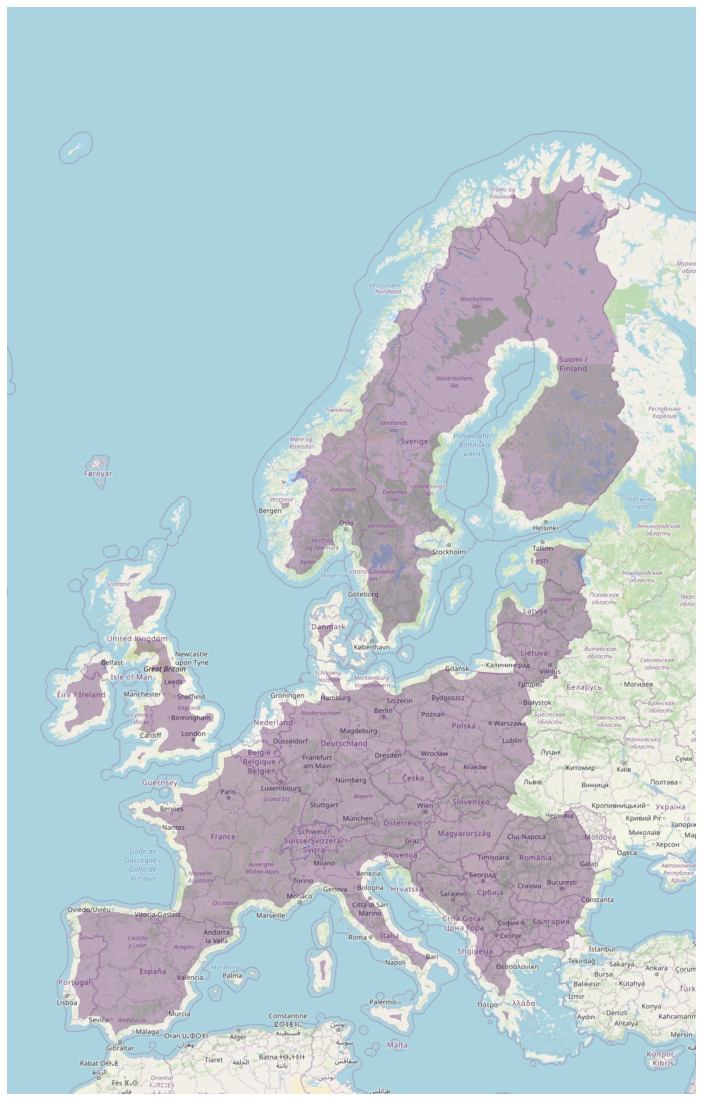

In [170]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
ax = geoplot.webmap(onshore,projection=gcrs.WebMercator(),figsize=(30,20),alpha=0.5)
#geoplot.choropleth(offshore,ax=ax,hue='gdp',alpha=1)
geoplot.choropleth(data,ax=ax,hue='gdp',alpha=0.3)
#geoplot.choropleth(m,ax=ax,hue='val_kwhm3',alpha=0.3)
#geoplot.choropleth(country,ax=ax,hue='gdp',alpha=0.3)

<GeoAxesSubplot:>

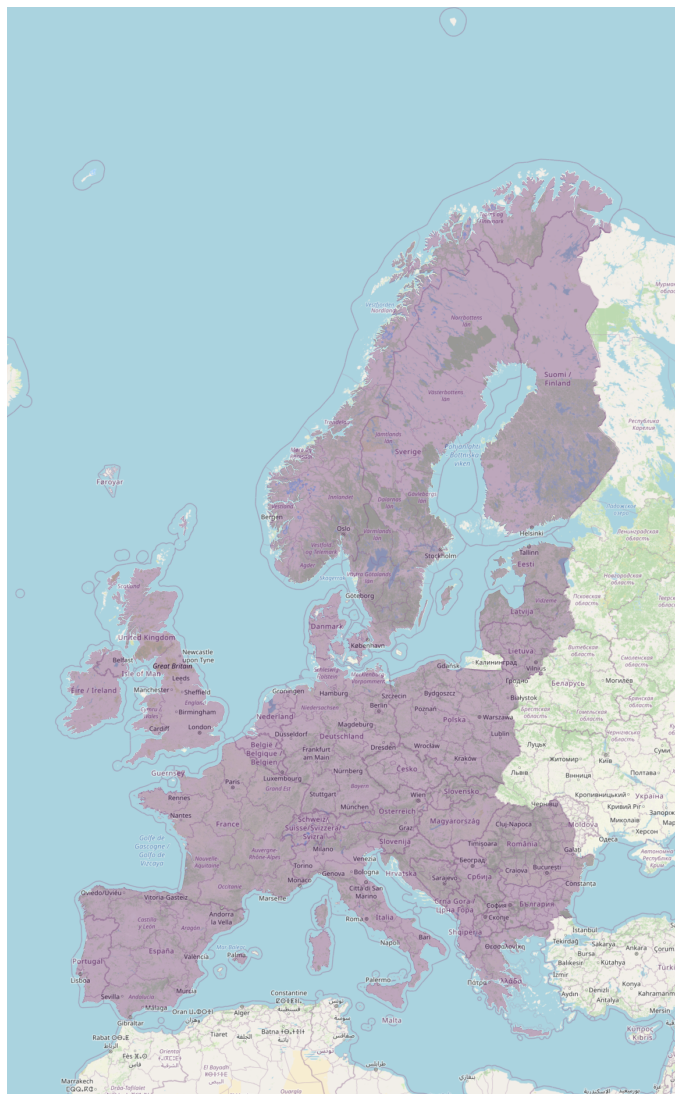

In [67]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
ax = geoplot.webmap(onshore,projection=gcrs.WebMercator(),figsize=(30,20),alpha=0.5)
geoplot.choropleth(country,ax=ax,hue='gdp',alpha=0.3)

<GeoAxesSubplot:>

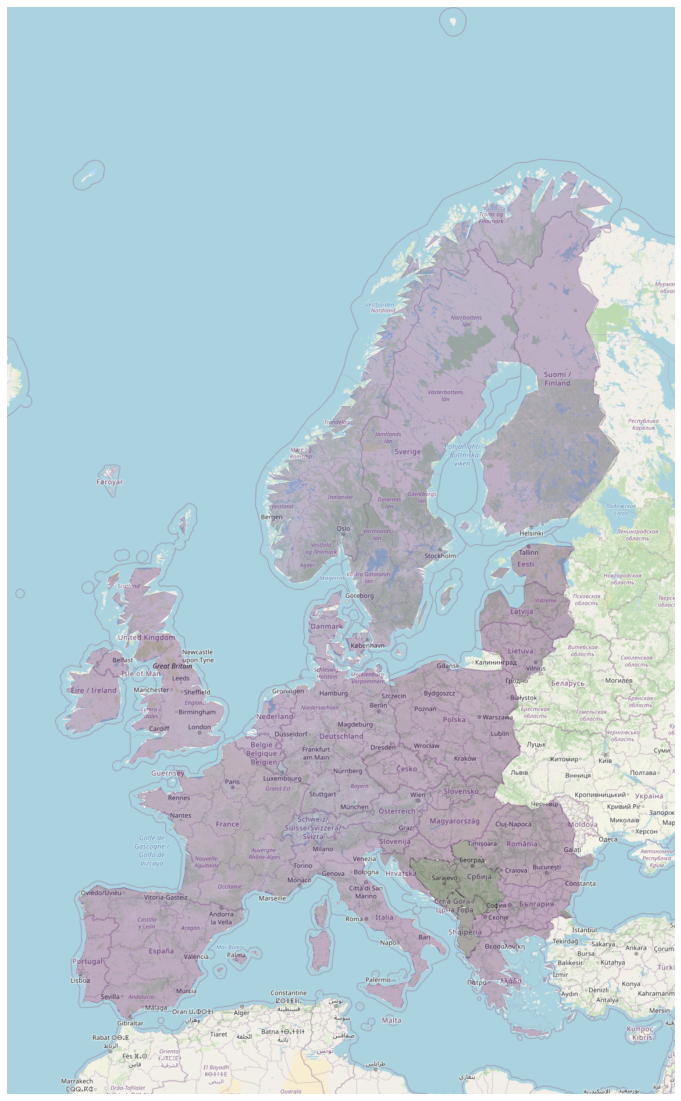

In [68]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
ax = geoplot.webmap(onshore,projection=gcrs.WebMercator(),figsize=(30,20),alpha=0.5)
geoplot.choropleth(onshore,ax=ax,hue='gdp',alpha=0.3)

<GeoAxesSubplot:>

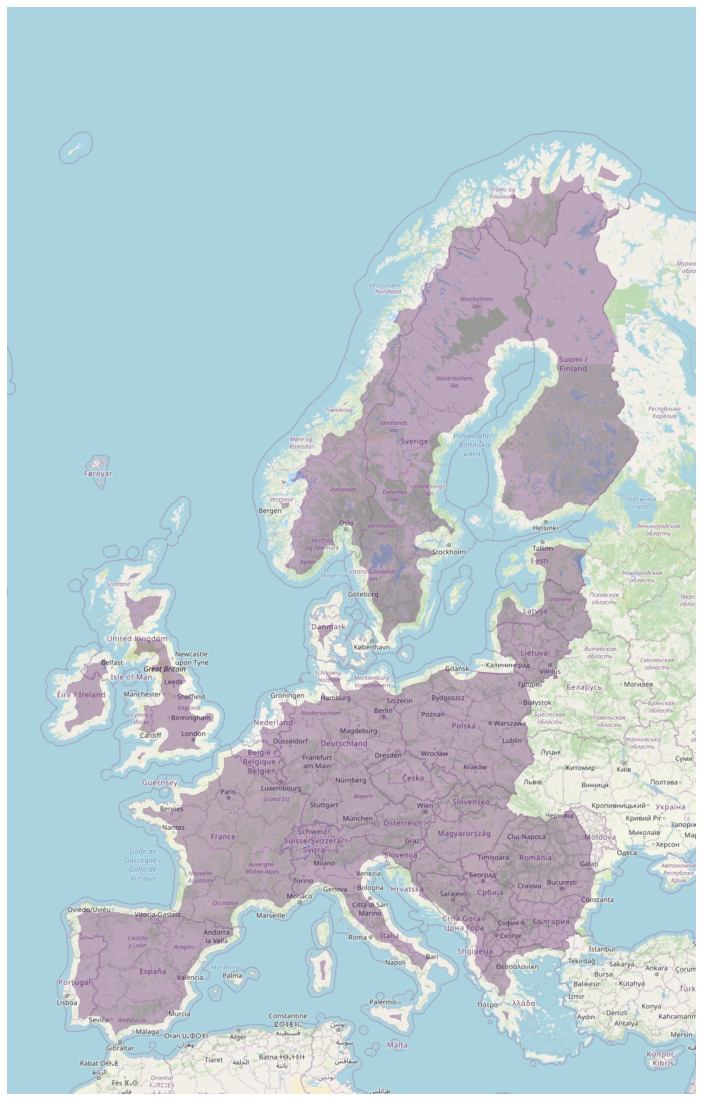

In [191]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
ax = geoplot.webmap(onshore,projection=gcrs.WebMercator(),figsize=(20,20),alpha=0.5)
geoplot.choropleth(data,ax=ax,hue='gdp',alpha=0.3)

In [179]:
gpd.read_file('result/nodes_capacity_map_pwh.geojson').columns

Index(['index', 'name', 'x', 'y', 'capacity', 'geometry'], dtype='object')

In [ ]:
import geopandas as gpd
import pandas as pd
import fiona
import rasterio
import rasterio.features
from shapely.geometry import shape, mapping
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.linestring import LineString
import time
from shapely.geometry import Point

# snakemake is a global value snakemake.input.


logger = logging.getLogger(__name__)


def geo_concat(list_to_concat):
    '''
        concat geodataframes in list_to_concat to one geodataframe

        Parameters
        -----------

        list_to_concat : list
            a list of geodataframes

        Return
        ------------
        eu : geopandas.GeoDataFrame
            the result with capacity/depth
            unit: kwh/m per country
        '''
    return gpd.GeoDataFrame(pd.concat(list_to_concat, ignore_index=True)).set_crs('EPSG:4326')


def create_nearshore_50_pair(on_path, off_path):
    onshore = gpd.read_file(on_path)
    offshore = gpd.read_file(off_path)
    offshore_buffer = offshore.to_crs(crs='EPSG:3395')
    offshore_buffer.geometry = offshore_buffer.buffer(50000)  # 50km buffer
    offshore_buffer = offshore_buffer.to_crs(crs='EPSG:4326')
    nearshore = gpd.clip(onshore, offshore_buffer)
    realonshore = gpd.overlay(onshore, offshore_buffer, how='difference')
    return nearshore, realonshore


def calculate_depth(mask, depth_type, capacity_path, density_map, capacity_name='val_kwhm3'):
    capacity = pd.read_csv(capacity_path)
    density_map = gpd.read_file(density_map)
    density_map.geometry = density_map.geometry.buffer(0)
    density_map = explode(density_map)
    density_map = density_map.set_crs(crs='EPSG:4326')

    capacity_per_depth = []
    # calculate capacity_per_depth
    # clip denstiy_map with mask

    for country in mask.name:
        # calculate onshore capacity
        mask_country = mask[mask.name == country]
        part_map = gpd.clip(density_map, mask_country)
        area_square_meter = part_map.to_crs(crs='EPSG:3395').area.values
        # add to list onshore capacity
        capacity_per_depth.append(
            sum(part_map[capacity_name].values * area_square_meter))
    mask['capacity_per_depth'] = capacity_per_depth
    df_capacity_per_depth = mask[['name', 'capacity_per_depth']]

    capacity = capacity.merge(df_capacity_per_depth,
                              left_on='name', right_on='name', how='left')

    capacity[depth_type + '_depth'] = capacity[depth_type] / \
        capacity['capacity_per_depth']

    return capacity[['name', depth_type + '_depth']]


def get_capacity(capacity, density_map, mask_list, depth_list, capacity_name='val_kwhm3'):
    capacity_per_country = []
    for mask, depth, storage_type in zip(mask_list, depth_list, ['onshore', 'nearshore', 'offshore']):
        depth = clean_dataframe(depth)
        for country in depth.name:
            # calculate onshore capacity
            mask_country = mask[mask.name == country]
            part_map = gpd.clip(density_map, mask_country)
            # calculate capacity per country
            part_map['capacity'] = part_map.to_crs(crs='EPSG:3395').area * depth[depth.name == country].iloc[0, -1] \
                * part_map[capacity_name]
            part_map['storage_type'] = storage_type
            # add to list onshore capacity
            capacity_per_country.append(part_map)
    return geo_concat(capacity_per_country)


def calculate_capacity_shape(onshore, nearshore, realoffshore, density_map_path, capacity_path,
                             capacity_name='val_kwhm3'):
    capacity = pd.read_csv(capacity_path)
    density_map = gpd.read_file(density_map_path)
    density_map.geometry = density_map.geometry.buffer(0)

    # calculate depths of onshore, nearshore(50km), and offshore
    onshore_depth = calculate_depth(
        onshore, 'onshore', capacity_path, density_map_path)
    nearshore_depth = calculate_depth(
        nearshore, 'nearshore', capacity_path, density_map_path)
    offshore_depth = calculate_depth(
        realoffshore, 'total_offshore', capacity_path, density_map_path)

    mask_list = [onshore, nearshore, realoffshore]
    depth_list = [onshore_depth, nearshore_depth, offshore_depth]
    return get_capacity(capacity, density_map, mask_list, depth_list, capacity_name)


def clean_dataframe(depth_df):
    depth_df.fillna(0, inplace=True)
    for column in depth_df.columns:
        if type(depth_df[column][0]) != str:
            depth_df[column] = depth_df[column].apply(
                lambda x: 0 if x > 1e5 else x)
    return depth_df


def explode(indata):
    '''
    This function split multipolygons to polygons

    Parameters
    ----------
    indata : geopandas.GeoDataFrame
        geometry of indata is multipolygons

    Return
    ----------
    outdf : geopandas.GeoDataFrame
        geometry of outdf is polygons
    '''
    indf = indata
    outdf = gpd.GeoDataFrame(columns=indf.columns)
    for idx, row in indf.iterrows():
        if type(row.geometry) == Polygon:
            outdf = outdf.append(row, ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indf.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row] * recs, ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom, 'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf, ignore_index=True)
    return outdf


def assgin_capacity2node(nodes, country_path, offshore_path, capacity_path,
                         considered_locations=['onshore', 'nearshore', 'offshore']):
    capacity_df = gpd.read_file(capacity_path)
    onshore = gpd.read_file(country_path)
    offshore = gpd.read_file(offshore_path)
    nodes = nodes.set_crs('EPSG:4326')
    lines = []

    rest_result = capacity_df[capacity_df['storage_type'].isin(
        considered_locations)]

    full_table = []
    for country in onshore['name']:
        try:
            mask = gpd.GeoDataFrame(pd.concat([onshore[onshore['name'] == country],
                                               offshore[offshore['name'] == country]], ignore_index=True))
            mask = mask.set_crs('EPSG:4326')
        except:
            mask = onshore[onshore['name'] == country]

        part_result = gpd.clip(rest_result, mask)
        #
        rest_result = rest_result[~rest_result.index.isin(part_result.index)]
        part_result = part_result.reset_index()
        part_nodes = gpd.clip(nodes, mask).reset_index()

        for i in range(len(part_result)):
            inx = part_nodes.geometry.apply(lambda x: x.distance(part_result.loc[i, 'geometry'])) \
                .argmin()
            part_nodes.loc[inx, 'capacity'] += part_result.loc[i, 'capacity']
            lines.append(LineString(
                [part_nodes.loc[inx, 'geometry'], part_result.loc[i, 'geometry'].centroid]))
        full_table.append(part_nodes)

        # verify total capacity
    capacity_per_node = gpd.GeoDataFrame(
        pd.concat(full_table, ignore_index=True))
    capacity_per_node = capacity_per_node.set_crs('EPSG:4326')

    return capacity_per_node


if __name__ == "__main__":
    # TODO: replace variables in block below with snakemake.input.variable
    # ------------------------------------------------
    onshore_path = 'resources/country_shapes.geojson'
    offshore_path = 'resources/offshore_shapes.geojson'
    density_map_path = 'result/final.shp'
    capacity_path = 'result/storage_potential_eu_kwh.csv'
    # ------------------------------------------------
    offshore = gpd.read_file(offshore_path)
    nearshore, realonshore = create_nearshore_50_pair(
        onshore_path, offshore_path)
    new_capacity_map = calculate_capacity_shape(
        realonshore, nearshore, offshore, density_map_path, capacity_path)
    new_capacity_map.capacity = new_capacity_map.capacity/1e12
    new_capacity_map.to_file(
        'result/new_energy_capacity_map_pwh.geojson', driver='GeoJSON')

    # TODO: replace variable below with network objects in network folder
    nodes = pd.read_csv('.test_file/example_nodes_45.csv')

    start = time.time()
    # convert network object to the form needed in this script
    capacity_per_node = gpd.GeoDataFrame(
        nodes, geometry=gpd.points_from_xy(nodes['x'], nodes['y']))
    # init capacity of each node with 0
    capacity_per_node['capacity'] = 0
    capacity_per_node = capacity_per_node[['name', 'capacity', 'geometry']]

    node_capacity = assgin_capacity2node(capacity_per_node,
                                         onshore_path,
                                         offshore_path,
                                         'result/new_energy_capacity_map_pwh.geojson',
                                         ['onshore', 'nearshore', 'offshore'])

    node_capacity.to_file(
        'result/nodes_capacity_map_pwh.geojson', driver='GeoJSON')
    print(time.time()-start)

In [190]:
try:
    gpd.read_file('aaaa.shp')
except(DriverError):
    print('b')

b


In [188]:
from fiona.errors import DriverError

In [192]:
import pathlib

In [193]:
p=pathlib.Path('')

In [206]:
str(p.absolute()).lower()

'/users/wenruizhou/documents/github/iai_hiwi/salt_cave'

In [224]:
gpd.read_file('new_energy_capacity_map_kwhm2.geojson')

,val_kwhm3,capacity_per_area,storage_type,geometry
0,200,111.177933,onshore,"POLYGON ((19.97965 40.96842, 20.00255 40.96842..."
1,300,166.766899,onshore,"MULTIPOLYGON (((19.95847 40.83096, 19.97965 40..."
2,350,194.561382,onshore,"POLYGON ((19.97052 40.89969, 19.97965 40.89969..."
3,400,222.355865,onshore,"POLYGON ((19.96784 40.94551, 19.97965 40.94551..."
4,200,0.000000,onshore,"POLYGON ((20.64400 39.86880, 20.66691 39.86880..."
...,...,...,...,...
114,200,249.322124,offshore,"MULTIPOLYGON (((14.13792 53.77440, 14.25048 53..."
115,250,311.652656,offshore,"POLYGON ((13.10702 54.39294, 13.19866 54.39294..."
116,300,373.983187,offshore,"MULTIPOLYGON (((6.34894 55.05729, 6.37185 55.0..."
117,350,436.313718,offshore,"MULTIPOLYGON (((12.90084 54.39294, 12.92375 54..."


,Unnamed: 0,full_name,depth_average,depth_onshore,depth_offshore
0,0,Albania,0.228246,0.239793,0.000000
1,1,Bosnia and Herzegovina,1.895429,1.895429,0.000000
2,2,Germany,0.498683,0.181823,1.245270
3,3,Denmark,0.731116,0.164915,1.074819
4,4,Spain,0.333667,0.336349,0.000000
5,5,France,0.169349,0.169349,0.000000
6,6,United Kingdom,0.668388,0.233941,0.920248
7,7,Greece,0.269306,0.279953,0.232191
8,8,Netherlands,0.787626,0.113479,1.035583
9,9,Norway,0.000000,0.000000,0.981879


In [198]:
import re

In [208]:
if re.search(r'salt',str(p.absolute()).lower()):
    print('a')

a
